<a href="https://colab.research.google.com/github/DiegoRInacio/Analise_de_dados/blob/main/Fundamentos_de_Machine_Laerning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fundamentos de Machine Laerning

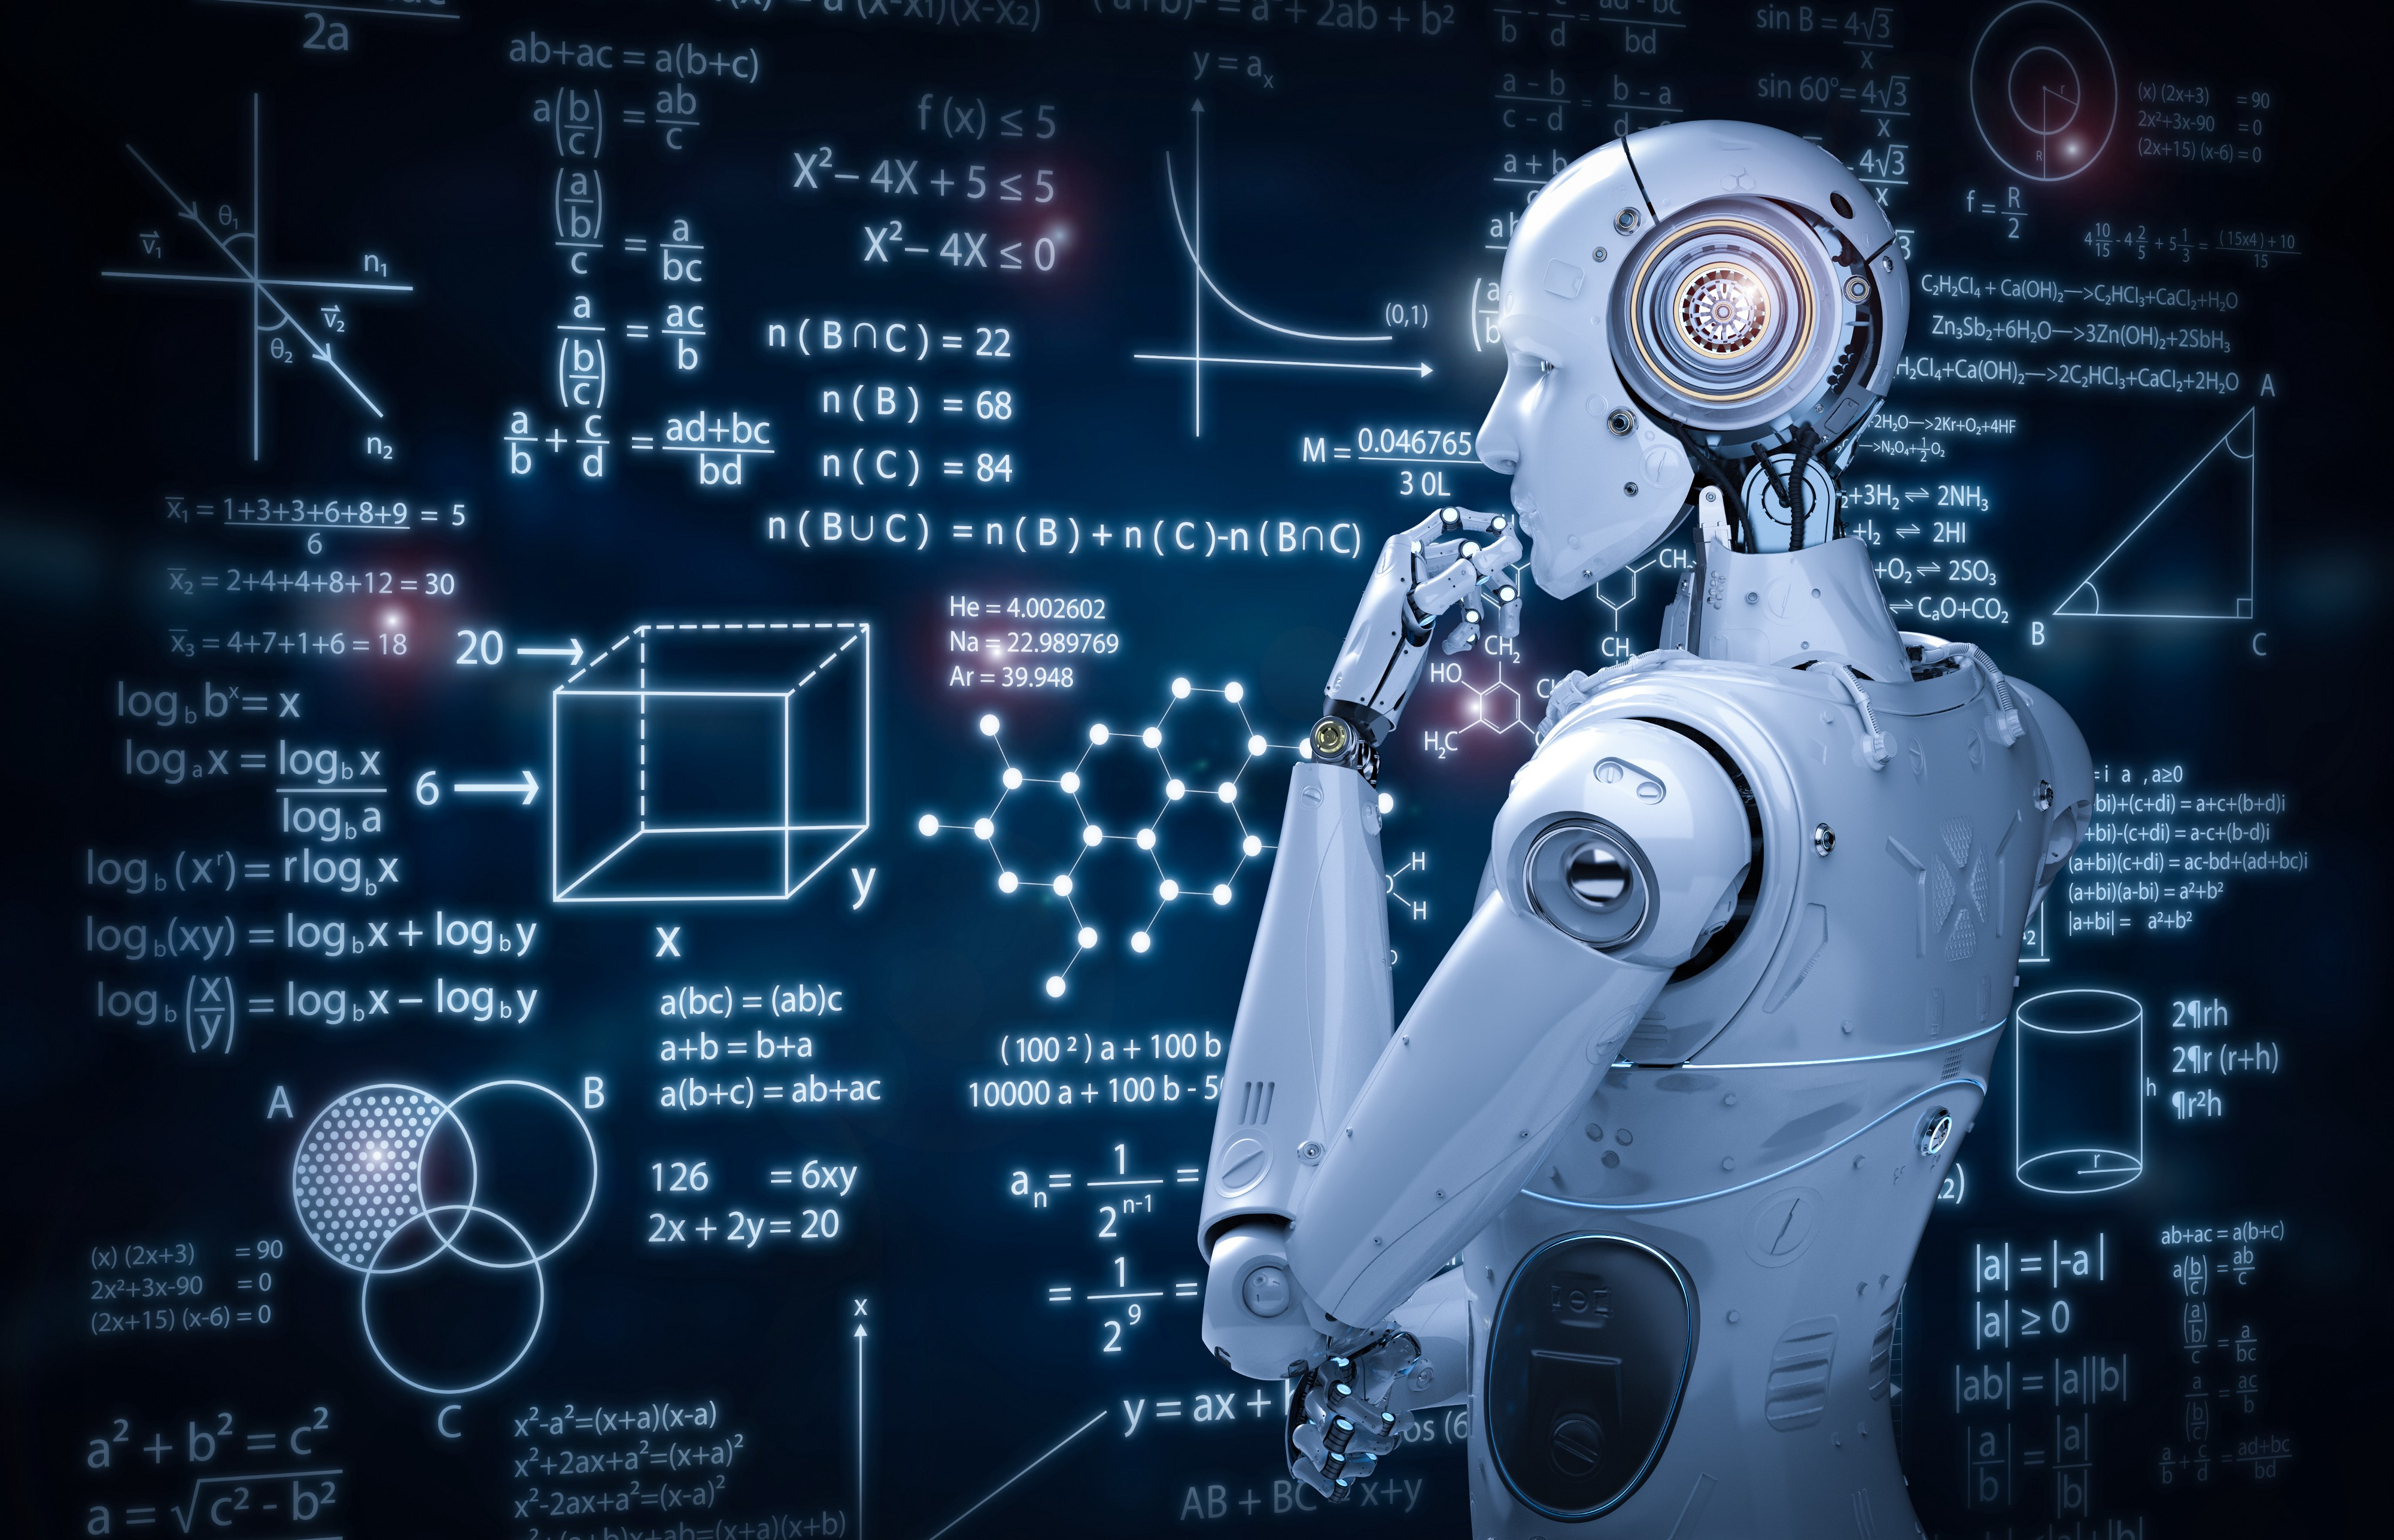

***
<h4>Vamos realizar operações que fazem parte dos fundamentos de Machine Laerning</h4>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Para importação da bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv('Bases/estudo_vs_salario.csv')
df.head()

,Unnamed: 0,Anos de Estudo,Salário
0,0,2.0,1559.0
1,1,4.0,3312.0
2,2,6.0,2078.0
3,3,7.0,3758.0
4,4,9.0,11724.0


<h4>Dropando a coluna 'Unnamed' que é nada mais nada menos que uma repetiçaõ do id do df</h4>

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0


<h4>Analisando a dimenssão do Data Frame</4>

In [ ]:
df.shape

(20, 2)

***
<h3>Descrição do DF</h3>
<br><br>
O dataset/dataframe 'estudo_vs_salario.csv' possuí duas variáveis importante que são: <strong>estudo de uma determinada pessoa</strong>, em comparação com o seu <strong>salário</strong>.
<br><br>
É importante salientar que esse dataset foi contruído apenas para fins didaticos e não representa um dado real, para estudar esse processo precisariamos de varias outras variaveis como:<br><br>
   - Tempo de estudo<br>
   - Tipo de estudo (se é academico ou profissionalizante)<br>
   - Entre outros tipos de variaveis que são importantes para não gerar erros na interpretaçaõ dos dados.<br>
***
# Então vamos seguir com o nosso planejamento
<br><br>
   - 1° Essa questão se trata de um <strong>aprendizado supervisionado</strong>.<br>
   - 2° Nossa Variavel target é  o salário, variável númerica.<br>
   - Sendo assim podemos adimitir que estamos diante de um problema de <strong>regressão</strong>.<br>

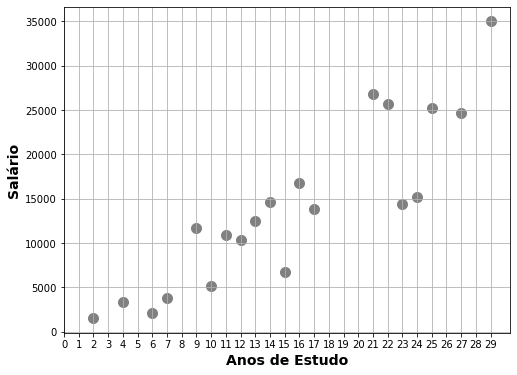

In [ ]:
#plot  da dispersão entre as variáveis

plt.figure(figsize = [8,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel('Anos de Estudo', fontweight = 'bold', fontsize = 14)
plt.ylabel('Salário', fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()
plt.show()

***
Esse gráfico aparente ter um padrão quando olhamos para a distribuição dos dados!

Aprenta ter um padrão linear

Por isso vamos realizar um segundo gráfico com uma função <strong>linear dos anos de estudo</strong>


# Salário = $\theta_0$ + $\theta_1$ x Anos de estudo

Esse modelo descrito anteriormente possue dois parametros que são $\theta_0$ e $\theta_1$, quando variamos esses dois parâmetros temos dois modelos diferentes, que correspondem a retas diferentes:

***
    Antes de parti para o modelo vamos encapsular uma função para theta0 e theta1 que retornará uma predição inicial
***

In [ ]:
#função de prediçao
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

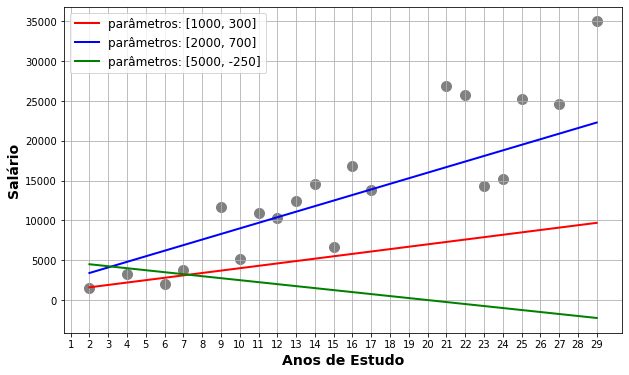

In [ ]:
x = df['Anos de Estudo']
y1 = funcao_linear(x, theta0 = 1000, theta1 = 300) #salário = 1000 + 300 * anos de estudo
y2 = funcao_linear(x, theta0 = 2000, theta1 = 700) #salário = 2000 + 700 * anos de estudo
y3 = funcao_linear(x, theta0 = 5000, theta1 = -250) #salário = 5000 + -250 * anos de estudo


plt.figure(figsize=[10,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()

plt.plot(x, y1, label = 'parâmetros: [1000, 300]', lw = 2, c = 'red')
plt.plot(x, y2, label = 'parâmetros: [2000, 700]', lw = 2, c = 'blue')
plt.plot(x, y3, label = 'parâmetros: [5000, -250]', lw = 2, c = 'green')
plt.legend(fontsize = 12)
plt.show()

Cada reta corresponde a um destino.

E podemos intuir qual modelo descrever melhor os dados?!

Imagino que sua resposta foi o modelo azul, descrito pelos parÂmetros $\theta_0$ = 2000 e $\theta_1$ = 700.

# Métrica de performace para modelo de regressão: Erro médio quadrático

<strong>(Sigla MSE, em Inglês "mean squared error")</strong>

Então vamos denotar por X o conjunto de variáveis explicativas e y a variável target.

Uma vez fixado os parâmetros $\theta_0$ e $\theta_1$, vamos denotar a predição do modelo por y_pred.

E vamos realizar isso nos próximo passos.

In [ ]:
X = df['Anos de Estudo']
X

0      2.0
1      4.0
2      6.0
3      7.0
4      9.0
5     10.0
6     11.0
7     12.0
8     13.0
9     14.0
10    15.0
11    16.0
12    17.0
13    21.0
14    22.0
15    23.0
16    24.0
17    25.0
18    27.0
19    29.0
Name: Anos de Estudo, dtype: float64

In [ ]:
Y = df['Salário']
Y

0      1559.0
1      3312.0
2      2078.0
3      3758.0
4     11724.0
5      5128.0
6     10965.0
7     10354.0
8     12457.0
9     14621.0
10     6711.0
11    16826.0
12    13827.0
13    26841.0
14    25739.0
15    14385.0
16    15156.0
17    25268.0
18    24623.0
19    34995.0
Name: Salário, dtype: float64


Quando usamos a "função linear" acima, tendo fixado os parâmetros (no caso $\theta_0$ = 2000 e $\theta_1$ = 700), definimos um reta que descreva uma relação entre X e Y sendo X(Anos de Estudo) e Y(Salário). Desta forma, podemos fazer predições de salários apartir da quantidade de anos estudados.

In [ ]:
y_pred = funcao_linear(x, theta0 = 2000, theta1 = 700)

y_pred

0      3400.0
1      4800.0
2      6200.0
3      6900.0
4      8300.0
5      9000.0
6      9700.0
7     10400.0
8     11100.0
9     11800.0
10    12500.0
11    13200.0
12    13900.0
13    16700.0
14    17400.0
15    18100.0
16    18800.0
17    19500.0
18    20900.0
19    22300.0
dtype: float64

O __Erro Médio Quadrático__ é dado pela fórmula:

### $1/{N} \cdot \sum_i{(y_i - y_{pred_i})^{2}}$,

onde a soma é realizada em todas as linhas do dataset e N é a quantidade de linhas (instâncias) do dataset.

__Uma métrica muito comum de se usar é a raiz quadrada do erro médio quadrático, representada por RMSE.__

Visualmente:

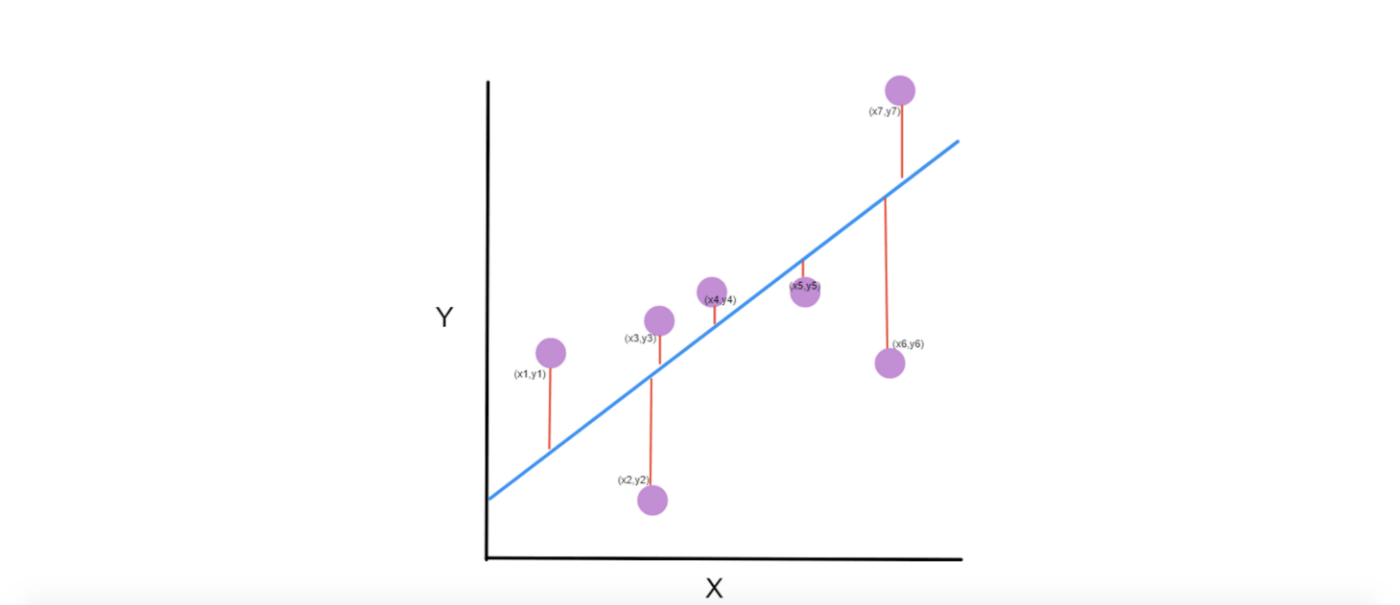
***
Podemos intuir que de acordo com a figura apresenta quanto menor o <strong>MSE</strong> ou <strong>RMSE</strong> melhor o modelo!

Agora iremos implementar a função RMSE para calcular o erro médio quadrático para testar em nosso problema:

In [ ]:
#Função do erro quadrático
def MSE(x, y_pred):
    return np.mean((y - y_pred)**2)

#Função da raiz quadrada do erro quadrático
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
y1 = funcao_linear(x, theta0 = 1000, theta1 = 300)
y2 = funcao_linear(x, theta0 = 2000, theta1 = 700)
y2 = funcao_linear(x, theta0 = 5000, theta1 = -250)

RMSE_1 = RMSE(y = df['Salário'], y_pred = y1)
RMSE_2 = RMSE(y = df['Salário'], y_pred = y2)
RMSE_3 = RMSE(y = df['Salário'], y_pred = y3)

print('O resultado de cada RMSE respectivamente por modelo é:')
print('Modelo 1 {}'.format(RMSE_1))
print('Modelo 2 {}'.format(RMSE_2))
print('Modelo 3 {}'.format(RMSE_3))

O resultado de cada RMSE respectivamente por modelo é:
Modelo 1 11039.182331585976
Modelo 2 16853.927184783966
Modelo 3 16853.927184783966


Analisnando o <strong>RMSE</strong> fica evidente de que o modelo que mais se adequa aos dados neste problema foi o <dtrong>Modelo 2</strong>, como assim como já aviamos percebido visualmente.
***
    Mas a questão principal é: Será que o modelo 2 é o melhor modelo possível?
***

# Modelo de Regreção Linear

Considerando um dataset/df (x) com n linhas e p variáveis, de modo que x tenha dimensão (n, p), e uma variável numérica Y, sendo sendo a variável target.
    
É possuvel representar a relação entre x e y de forma linear como já visto anteriormente:
    
## Y = $\theta_0$ + $\theta_1$ $\cdot x_1$ + $\theta_2$ $\cdot x_2$ +..+ $\theta_p$ $\cdot x_p$

O modelo o modelo de Regressão Linear é o __modelo linear em que os parâmetros minimizam o MSE__


## Modelo de Regressão Linear Simples

É o modelode regressão linear, com apenas uma variavel preditora. Neste caso, X tem uma dimenssão (n, 1) e a relação é:

## Y = $\theta_0$ + $\theta_1$ $\cdot X_1$

Desta forma imagine se pudessemos testar todas as combinações de $\theta_0$ e $\theta_1$. Então a combinação que gerar o menor MSE, seria o modelo de regressão linear simples.

Sendo assim na figura abaixo, foi criada uma malha de pontos simulando várias combinações de $\theta_0$ e $\theta_1$ logo depois foi calculado o RMSE em cada uma dessas combinações.

Visualmente podemos notar a diferente do MSE para diferntes coninações:

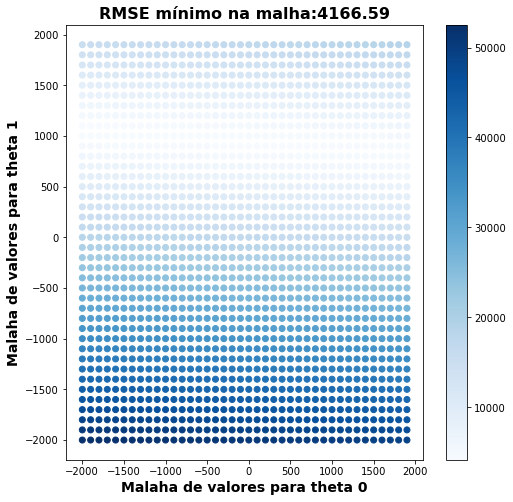

In [ ]:
theta_0 = np.arange(-2000, 2000, 100)
theta_1 = np.arange(-2000, 2000, 100)

grid0, grid1 = np.meshgrid(theta_0, theta_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

x = df['Anos de Estudo']
y = df['Salário']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = x, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize = [8, 8])
plt.title('RMSE mínimo na malha:' + str(np.round(RMSE_min, 2)), fontweight = 'bold', fontsize = 16)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.Blues)
plt.xlabel('Malaha de valores para theta 0', fontweight = 'bold', fontsize = 14)
plt.ylabel('Malaha de valores para theta 1', fontweight = 'bold', fontsize = 14)
plt.colorbar()
plt.show()

***
A situação apresentada acima é apenas para mostrar como descobrir a melhor combinação de parâmetros.

Na pratica naõ precisamos fazer esse passo a passo, pois, já existem algoritmos especificos para resolver esses problemas.

Sendo assim vamos agora usar a bibliotéca <strong>scikit-learn</strong> para orientar melhor o modelo de aprendizado de máquina "Machine Laerning".

Link para documentção da bibliotéca https://scikit-lern.org/stable/

Essa bibliotéca é muito útil e pratica no contexto de <strongMachine Learning</strong>, pois, ela possuí uma simplicidade muito grande para o seu uso, assim como, possuí uma gama de algoritmo já implementados. 

Para fazer uso dessa bibliotéca vamos seguir os seguintes passos:

  - 1 <strong>Vamos instanciar o algoritmo</strong>
  - 2 <strong>Filtrar</strong> o algoritmo: (Podemos dizer que é o equivalente a <strong>treinar o algoritmo com os dados</strong>)
       - 2.1 é o aprendizado não supervisionado
           - 2.1.a Precisamos fornecer 2 Array que são (x e y) para realização deste método
           - 2.1.b O fromato dos array deve ser:
                   - Array x = r (n, k)
                   - Array y = (n, 1)
       - 2.2 Para o aprendizado não supervisionado é necessário fornecer 1 Array X para realização desse método e o formato desse array deve ser (n, k)
  
  - 3 Assim que já estivermos com o nosso algoritmo já treinado e fitado iremos realizar a <strong>predição</strong>
  
<br>
Para o modelo de regrassão linear citado acima foi importada da bibliotéca scikit-learn a ferramente de regressão linear <strong>LinearRegression</strong>
***


In [ ]:
#instanciando o algoritmo

lm = LinearRegression()
lm

LinearRegression()

In [ ]:
#mostrando os tipos de cada uma das variaveis X e Y

type(X), type(Y)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
#realizando ajudates para o formato correto

X = X.values.reshape(-1, 1)
type(X), X.shape

(numpy.ndarray, (20, 1))

In [ ]:
Y = Y.values.reshape(-1, 1)
type(Y), Y.shape

(numpy.ndarray, (20, 1))

In [ ]:
#Filtrando - treinando o modelo dos dados

lm.fit(X, Y)

LinearRegression()

In [ ]:
#realizando predições com os filtros

ypred = lm.predict(X)

ypred

array([[  -32.01522673],
       [ 2072.60877727],
       [ 4177.23278128],
       [ 5229.54478328],
       [ 7334.16878728],
       [ 8386.48078929],
       [ 9438.79279129],
       [10491.10479329],
       [11543.41679529],
       [12595.7287973 ],
       [13648.0407993 ],
       [14700.3528013 ],
       [15752.6648033 ],
       [19961.91281131],
       [21014.22481332],
       [22066.53681532],
       [23118.84881732],
       [24171.16081932],
       [26275.78482333],
       [28380.40882733]])

***
Agora vamos calcular o RMSE para o modelo de regressão linear simples, bem como podemos observa na reta criada aparti do modelo.

Na Sequência vamos comparar a reta criada através do algoritmo <strong>LinearRegression</strong> com as outras retas
***

In [ ]:
RMSE(y = Y, y_pred = ypred)

4146.730024229038

***
Vamos plotar esses dados

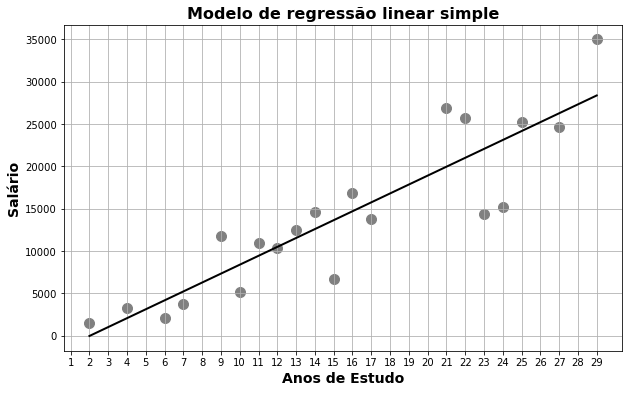

In [ ]:
plt.figure(figsize = [10, 6])
plt.title('Modelo de regressão linear simple', fontweight = 'bold', fontsize = 16)
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel('Anos de Estudo', fontweight = 'bold', fontsize = 14)
plt.ylabel('Salário', fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 30))

plt.plot(X, ypred, c = 'black', lw = 2)
plt.grid()
plt.show()

***
        Agora uma analise comparativa entre os dados
***

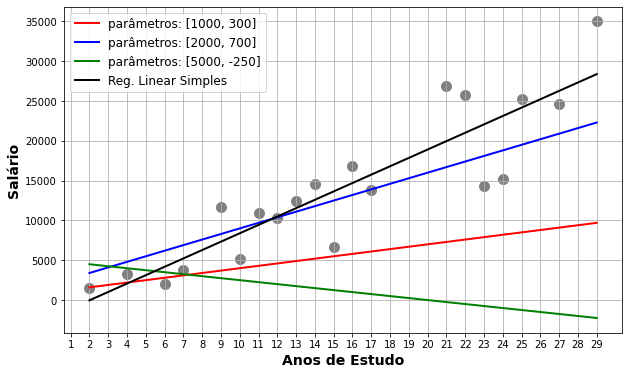

In [ ]:
X = df['Anos de Estudo']
y1 = funcao_linear(X, theta0 = 1000, theta1 = 300)
y2 = funcao_linear(X, theta0 = 2000, theta1 = 700)
y3 = funcao_linear(X, theta0 = 5000, theta1 = -250)


plt.figure(figsize=[10,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel("Anos de Estudo", fontweight = 'bold', fontsize = 14)
plt.ylabel("Salário", fontweight = 'bold', fontsize = 14)
plt.xticks(range(0,30))
plt.grid()

plt.plot(X, y1, label = 'parâmetros: [1000, 300]', lw = 2, c = 'red')
plt.plot(X, y2, label = 'parâmetros: [2000, 700]', lw = 2, c = 'blue')
plt.plot(X, y3, label = 'parâmetros: [5000, -250]', lw = 2, c = 'green')
plt.plot(X, ypred, c = 'black', lw = 2, label = 'Reg. Linear Simples')
plt.legend(fontsize = 12)
plt.show()

***
As combinações de parâmetros que o modelo de regrassão linear simples usam são:

($\theta_0$ também que também é conhecido como __intercepto__ $\theta_1$ é o coeficiente)

In [ ]:
lm.intercept_, lm.coef_

(array([-2136.63923074]), array([[1052.312002]]))

***
Bem é isso ai se você entendeu tudo até aqui, já pode dizer que compreende o mecanismo do modelo de Machine Laerning e medir quantitativamente o o nível  de erro que o modelo esta cometendo. 


Obviamente, isso ainda é uma conhecimento simple com relaçaõa Machine Laerning, por isso, vamos agora aumentar o nível afim de oferecer maiores conheciemntos no assunto, vamos na sequência discutir sobre outro modelo muito conhecido e que possuí uma lógica de aprendizado muito diferente do modelo de regressão linear.

***

# K-Nearest Neighbor

## Também conhecido como K-NN

## K-vizinho mais próximo.

Como dito anteriormente a lógico de aprendizado por trás desse algoritmo é bem diferente da regressão linear simples, vista anteriormente.

Neste caso, o algoritmo considera apenas os <strong>vizinos mais próximos</strong> referente ao dataser de treino para fazer a predição.

Além disso, a técnica <strong>KNN pode ser usada tanto para regressão quanto apra classificação</strong>

Vamos realizar um exemplo para facilitar o entendimento:

In [ ]:
#funçaõ auxiliar

def KNN_plot(new_X1, new_X2):
    axis_X1 = [1,1.5,2,2.5,1.7,3,4,5,6]
    axis_X2 = [1, 0.8, 1.2, 3., 1.4, 4, 4.2, 3.6, 5]
    label__ = [0, 0, 0, 0, 0, 1, 1, 1, 1]
    dframe = pd.DataFrame(np.c_[axis_X1, axis_X2, label__], columns = ['x1', 'x2', 'y'])
    plt.figure(figsize = [8, 6])
    plt.scatter(dframe.loc[dframe.y==0].x1, dframe.loc[dframe.y==0].x2, c = 'red', s = 120, label = 'Classe Vermelha')
    plt.scatter(dframe.loc[dframe.y==1].x1, dframe.loc[dframe.y==1].x2, c = 'blue', s = 120, label = 'Classe Azul')
    plt.grid()
    plt.scatter(new_X1, new_X2, s = 200, c = 'gray', label = 'qual classe?')
    plt.legend(fontsize = 15, bbox_to_anchor = [1., 1.])
    plt.show()

***
Exemplos:

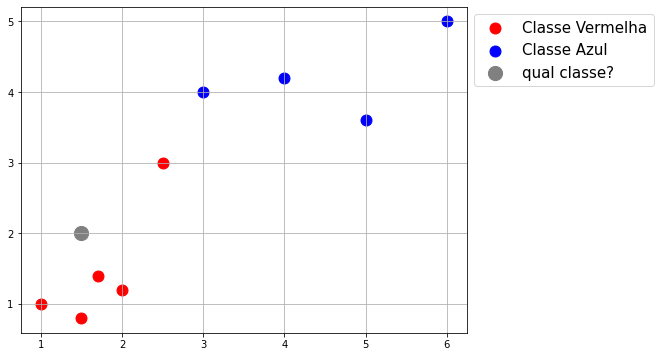

In [ ]:
KNN_plot(1.5, 2)

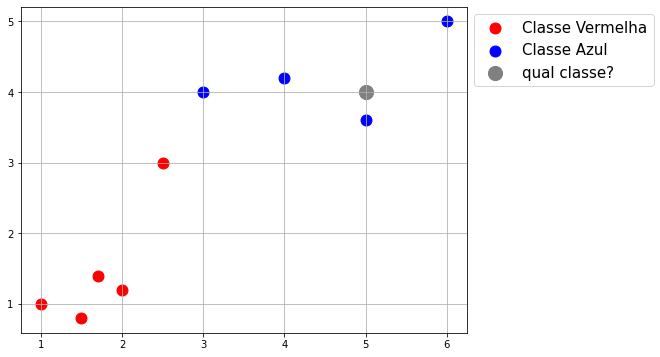

In [ ]:
KNN_plot(5, 4)

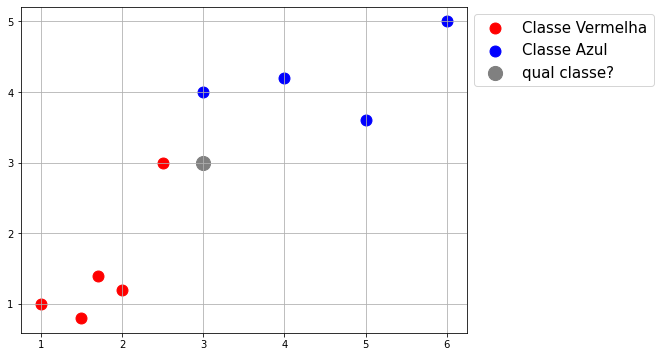

In [ ]:
KNN_plot(3, 3)

<br>

<h1>K-NN</h1>

Em primeiro lugar fixamos o valor de <strong>K</strong>, a <strong>quantidade de vizinhos</stonrg> que serão consideradas

<br>

<h3>Em calssificação:</h3>


A predição é data pelo <strong>voto majoritário</strong> da vairavel target <strong>desses vizinhos mais próximos</strong>


<h3>Regressão:</h3>


A predição é data pela <strong>média</strong> da variavel target com relação aos <strong>vizinhos mais próximos.</strong>

<br>
<strong>Vamos para um exemplo:</strong>

Considerando as informações inseridas logo abaixo, que contem informaç~eos de 9 casas.
Temos a quantidade de quartos, a área da casa(em m<sup>2</sup>) e considerando também o preço de venda.

Dataset:
   Num_Quartos  Área  Preço
0            1    30  16000
1            1    40  18000
2            1    50  20000
3            2    40  28000
4            2    70  34000
5            2    50  30000
6            3   100  50000
7            3    70  44000
8            4    95  59000



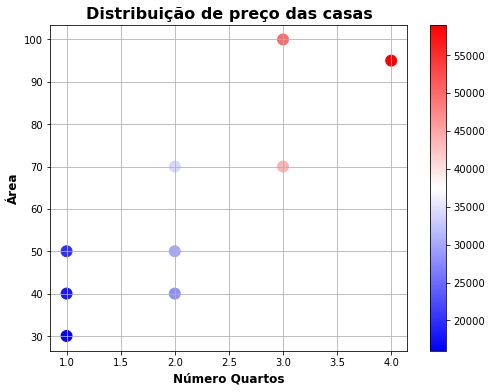

In [ ]:
#Quantidade de quartos

qtd_quartos = [1, 1, 1, 2, 2, 2, 3, 3, 4]
area = [30, 40, 50, 40, 70, 50, 100, 70, 95]
preco = np.array(qtd_quartos) * 10000 + np.array(area) * 200

dframe = pd.DataFrame(np.c_[qtd_quartos, area, preco], columns = ['Num_Quartos', 'Área', 'Preço' ])
print('Dataset:')
print(dframe)
print()
plt.figure(figsize = [8, 6])
plt.scatter(dframe.Num_Quartos, dframe.Área, c = preco, cmap = plt.cm.bwr, s = 120)
plt.colorbar()
plt.grid()
plt.title('Distribuição de preço das casas', fontweight = 'bold', fontsize = 16)
plt.xlabel('Número Quartos', fontweight = 'bold', fontsize = 12)
plt.ylabel('Área', fontweight = 'bold', fontsize = 12)
plt.show()

***
<strong>Agora uma questão interessante:</strong>

Quanto custa uma casa que tem 1 quarto de 60m<sup>2</sup>?

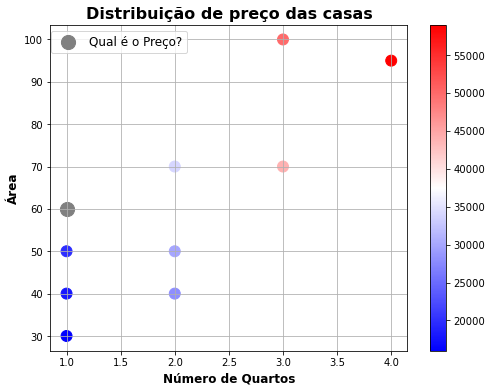

In [ ]:
qtd_quartos_novo = 1
area_novo = 60

plt.figure(figsize = [8, 6])
plt.scatter(dframe.Num_Quartos, dframe.Área, c = preco, cmap = plt.cm.bwr, s = 120)
plt.colorbar()
plt.grid()
plt.title('Distribuição de preço das casas', fontweight = 'bold', fontsize = 16)
plt.xlabel('Número de Quartos', fontweight = 'bold', fontsize = 12)
plt.ylabel('Área', fontweight = 'bold', fontsize = 12)
plt.scatter(qtd_quartos_novo, area_novo, s = 200, c = 'gray', label = 'Qual é o Preço?')
plt.legend(bbox_to_anchor = [0.4, 1], fontsize = 12)
plt.show()

***
Agora como nas vez anterior iremos usar o algoritmo do scikit-lern do KNN para responder essa pergunta!

A sintaxe de uso desse algoritmo é muito semelhante a da regrssão linear - que irá facilitar bastante o trabalho para essa etapa
***

Vamos chamar nosso DataFrame noso

In [ ]:
dframe

,Num_Quartos,Área,Preço
0,1,30,16000
1,1,40,18000
2,1,50,20000
3,2,40,28000
4,2,70,34000
5,2,50,30000
6,3,100,50000
7,3,70,44000
8,4,95,59000


In [ ]:
X = dframe[['Num_Quartos', 'Área']].values
y = dframe.Preço.values

type(X), X.shape

(numpy.ndarray, (9, 2))

Aqui iremos instanciar o KNN - e vamos criar um parâmetro considerando até 3 vizinhos:

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)

In [ ]:
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#Dessa forma criamos a casa que queremos estimar o preço

nova_casa = np.array([[1, 60]])

In [ ]:
#realizando a predição

knn.predict(nova_casa)

array([28000.])

***
Sendo assim podemos confirmar que usando o KNN com <strong>3 vizinhos</strong>, o valor da casa foi de R$28000, mas e se tivessoms usado, 1 vizinho ou 5 vizinhos?

Bem para isso vamos realizar um <strong>loop for</strong> que ira considera uma quantidade de vizinhos de 1 até 9 dessa forma vamos ver como o preço da casa irá variar:

In [ ]:
for num_vizinhos in range(1, 10):
    
    knn = KNeighborsRegressor(n_neighbors = num_vizinhos)
    knn.fit(X, y)
    pred__ = knn.predict(nova_casa)[0]
    
    print('Número de vizinhos: {} e valor estimado {}'.format(num_vizinhos, pred__))

Número de vizinhos: 1 e valor estimado 20000.0
Número de vizinhos: 2 e valor estimado 27000.0
Número de vizinhos: 3 e valor estimado 28000.0
Número de vizinhos: 4 e valor estimado 32000.0
Número de vizinhos: 5 e valor estimado 29200.0
Número de vizinhos: 6 e valor estimado 29000.0
Número de vizinhos: 7 e valor estimado 27142.85714285714
Número de vizinhos: 8 e valor estimado 31125.0
Número de vizinhos: 9 e valor estimado 33222.22222222222


### Conclusão: 
O __KNN__, assim como vários outros algoritmos que iremos estudar, __é bastante dependente dos parâmetros que setamos no algoritmo.__

Esses parâmetros, como são setados antes do modelo ser fitado nos dados, são também chamados de __hiper-parâmetros.__

Cabe ao __cientista de dados__ analisar o problema em questão e __descobrir qual é om melhor parâmetro__ a ser usado neste caso!

### Retomando a questão: prever o salário de uma pessoa, a partir da quantidade de anos estudados...

Vamos retomar ao nosso problema de predição de salário a partir da quantidade de anos estudados e ver como o KNN - Regressor se comporta.

In [ ]:
df

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0
5,10.0,5128.0
6,11.0,10965.0
7,12.0,10354.0
8,13.0,12457.0
9,14.0,14621.0
